# Gain GD by python code
y=loss(x)=(x-2.5)2-1
Build 140 points in the range of -1 to 6 and find the corresponding loss function value.

S1: Gain loss function


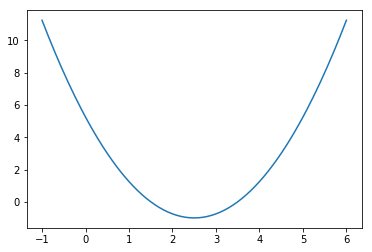

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def lossFunction(x):
    return (x-2.5)**2-1

# Build 140 points in the range of -1 to 6
plot_x = np.linspace(-1,6,141)
# plot_y Is the corresponding loss function value
plot_y = lossFunction(plot_x)

plt.plot(plot_x,plot_y)
plt.show()

S2:The essence of gradient descent is known to be the derivative of multivariate functions, which defines a derivation method, using the derivative method in the scipy library.

In [26]:
"""
Algorithm: Calculate the corresponding derivative of loss function J at the current point
Input: Current data point Theta
Output: Derivative of point on loss function
"""
def dLF(theta):
    return derivative(lossFunction, theta, dx=1e-6)

S3:
The gradient descent method has several points to note:
Initial value, super parameter. can be defined as 0 first. 
Learning rate, that is, the step size of each step. 
How to end the cycle: minimize the loss function because the gradient is decreasing, so the value of the loss function corresponding to the new point is decreasing, but the difference will be smaller and smaller, so we can set a very small number as a threshold. If the difference of the loss function is smaller than the threshold, we think it has been found.


In [27]:
theta = 0.0
eta = 0.1
epsilon = 1e-6
while True:
    # What is the gradient required for the current point after each cycle
    gradient = dLF(theta)
    last_theta = theta
    # moving point, moving step eta in the opposite direction of the gradient
    theta = theta - eta * gradient
    # Determine whether the theta reaches the minimum
    # Because the gradient is going down, the loss function of the new Theta is going down
    # See if the deviation ( difference) meets the requirements
    if(abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
        break
print(theta)
print(lossFunction(theta))


2.498732349398569
-0.9999983930619527


# S4:make the S3 into the function

In [28]:
theta = 0.0
eta = 0.1
epsilon = 1e-6
def gradient_descent(initial_theta, eta, epsilon=1e-6): #Main Gradient Descent function
    theta = initial_theta #we will take the value of initial theta as a paraameter in main function 
    theta_history.append(theta) #add the value of current theta in the list of theta_history
    while True:
        # What is the gradient required for the current point after each cycle
        gradient = dLF(theta)
        last_theta = theta
        # Determine whether the theta reaches the minimum
        theta = theta - eta * gradient #update equation of theta
        theta_history.append(theta)       
    # Determine whether the theta reaches the minimum
    # Because the gradient is going down, the loss function of the new Theta is going down
    # See if the deviation ( difference) meets the requirements
        if(abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
            break
# draw the figure
def plot_theta_history():
    plt.plot(plot_x,plot_y)
    plt.plot(np.array(theta_history), lossFunction(np.array(theta_history)), color='red', marker='o')
    plt.show()

# S5: Call the function, adjust the learning rate to call.

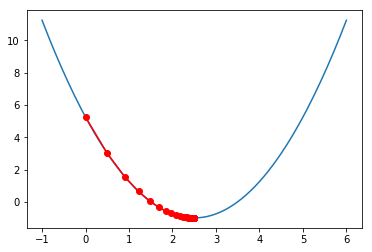

Number of gradient descent searches： 35


In [29]:
eta=0.1
theta_history = []
gradient_descent(0., eta) #initial theta is 0 and eta =0.1
plot_theta_history() #plotting the data
print("Number of gradient descent searches：",len(theta_history))


We find that the movement is relatively large at the beginning, because the learning rate is certain, and then multiplied by the gradient itself is large (steep), and then the gradient value is small (gentle) so the movement is relatively small. And experienced 34 searches.


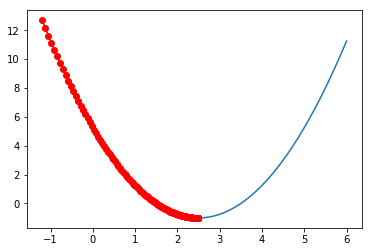

Number of gradient descent searches： 329


In [30]:
eta=0.01
theta_history = []
gradient_descent(-1.2, eta) #here i changed the starting point  
plot_theta_history()
print("Number of gradient descent searches：",len(theta_history))

# What will happen to further increase the learning rate?

In [ ]:
eta=1.2
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
print("Number of gradient descent searches：",len(theta_history))

It can be seen that the learning rate will be increased in a certain range, or it will gradually converge. However, it should be noted that if the learning rate is too high and one step goes to the point of "increase of loss function value", further and further along the wrong path, it will lead to non-convergence and OverflowError will be reported.
In order to avoid error reporting, the original code can be improved:
Capture a field while calculating the value of the loss function


In [32]:
def lossFunction(x):
    try:
        return (x-2.5)**2-1
    except:
        return float('inf')

# Set the conditions to end the loop

In [33]:
def gradient_descent(initial_theta, eta, n_iters, epsilon=1e-6):
    theta = initial_theta
    theta_history.append(theta)
    i_iters = 0
    while i_iters < n_iters:
        gradient = dLF(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if(abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
            break
        i_iters += 1

# Call the function

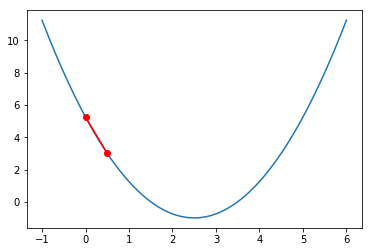

Number of gradient descent searches：  2


In [34]:
eta=0.1
theta_history = []
gradient_descent(0., eta,200,1000)
plot_theta_history()
print("Number of gradient descent searches： ",len(theta_history))